<h1>Импорт библиотек

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [22]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Your code goes here
    res = None
    for matrix in X:
        for vector in V:
            matrix, vector = np.asarray(matrix), np.asarray(vector)
            if res is None:
                res = np.dot(matrix, vector)
            else:
                res += np.dot(matrix, vector)
    return res

print(sum_prod([ [[3,3],[2,5]], [[3,3],[2,5]] ], [ [[2], [2]], [[2], [2]] ]))

[[48]
 [56]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [23]:
def binarize(M, threshold=0.5):
    M = np.asarray(M)
    M[M > threshold] = 1
    M[M <= threshold] = 0
    return M

print(binarize(M=[[0.6, 0.1], [0.2, 0.9]]))

[[1. 0.]
 [0. 1.]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [24]:
def unique(row):
    uniq = {}
    for i in row:
        if uniq.get(i) is None:
            uniq[i] = 1
        else:
            uniq[i] += 1
    return [k for k, v in uniq.items() if v == 1]

def unique_rows(mat):
    # Your code goes here
    n, m = mat.shape
    res = []
    for i in range(n):
        res.append(unique(list(mat[i])))
    return res


def unique_columns(mat):
    # Your code goes here
    n, m = mat.shape
    res = []
    for i in range(m):
        res.append(unique(list(mat[:,i])))
    return res

# Возвращают исключительно уникальные значения в строках и столбцах
mat = np.array([[1,2,3,2], [3, 3, 1, 1], [3, 5, 4, 3]])
print(unique_rows(mat))
print(unique_columns(mat))


[[1, 3], [], [5, 4]]
[[1], [2, 3, 5], [3, 1, 4], [2, 1, 3]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Гистограммы строк и столбцов


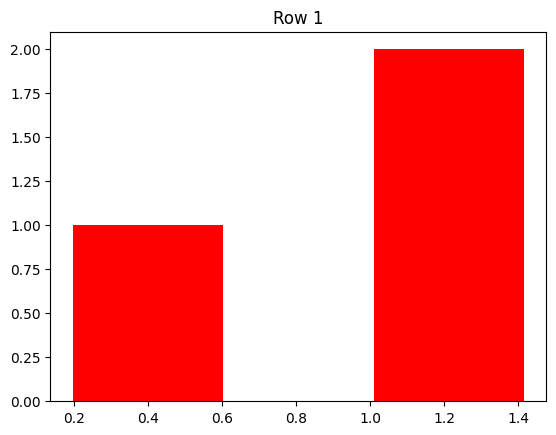

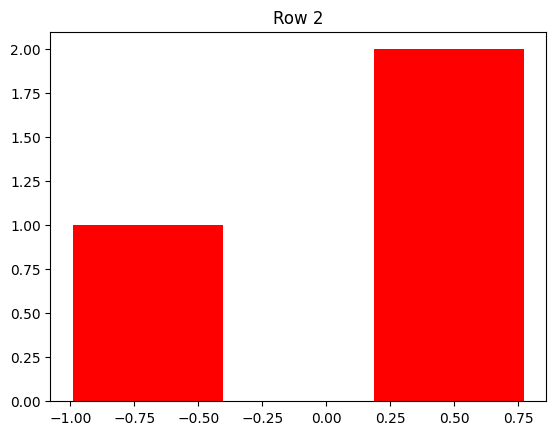

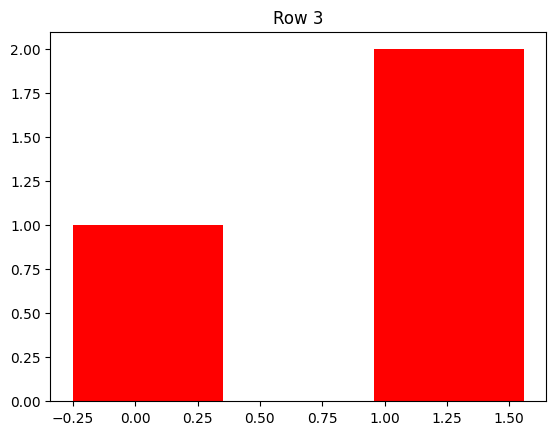

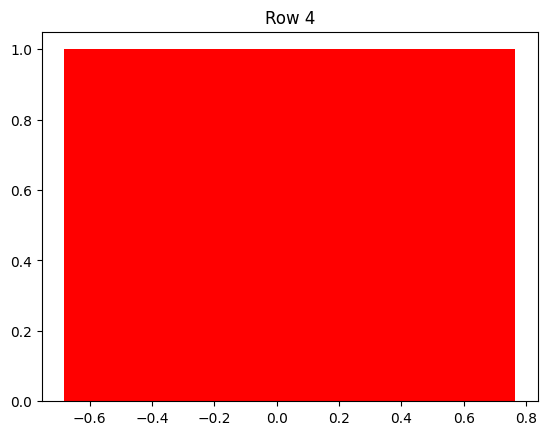

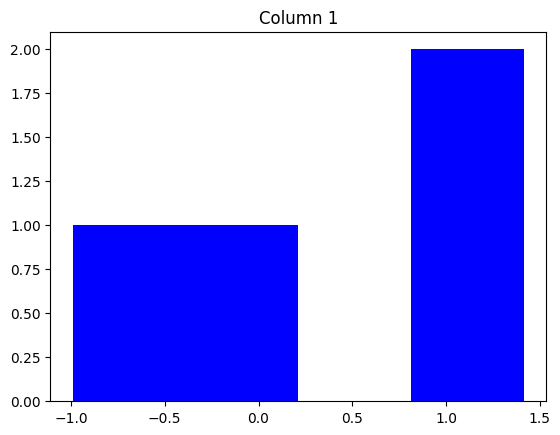

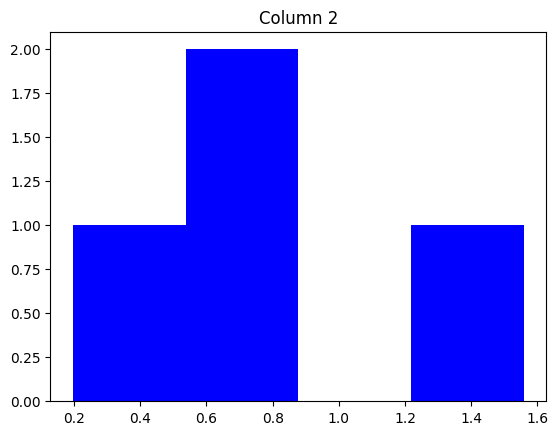

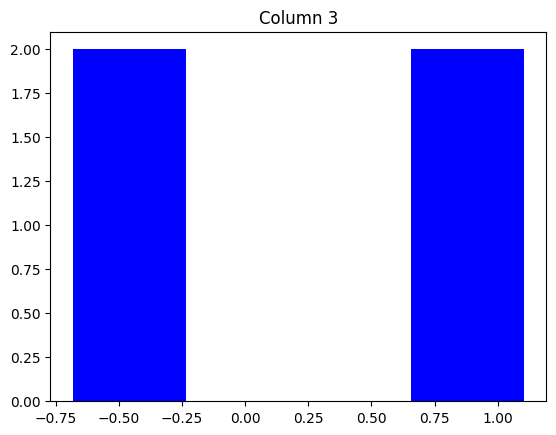

Матрица
[[ 1.42  0.2   1.1 ]
 [-0.99  0.71  0.77]
 [ 0.99  1.56 -0.25]
 [-0.05  0.76 -0.68]]
Математическое ожидание столбцов
[0.34 0.81 0.24]
Математическое ожидание строк
[0.91 0.16 0.77 0.01]
Дисперсия столбцов
[0.88 0.24 0.53]
Дисперсия строк
[0.27 0.67 0.57 0.35]


In [32]:
import numpy as np
import matplotlib.pyplot as plt

def normal_matrix(m, n):
    # заполняем матрицу
    mat = np.random.randn(m, n)

    # считаем мат. ожидание и десперсию столбцов и строк
    payoff_col = np.mean(mat, axis=0)
    payoff_row = np.mean(mat, axis=1)
    var_col = np.var(mat, axis=0)
    var_row = np.var(mat, axis=1)

    return payoff_col, payoff_row, var_col, var_row, mat

def histogram_matrix(mat):
    m, n = mat.shape

    for i in range(m):
        plt.hist(mat[i, :], bins = n, color='r')
        plt.title(f'Row {i+1}')
        plt.show()
    for i in range(n):
        plt.hist(mat[:, i], bins = m, color='b')
        plt.title(f'Column {i+1}')
        plt.show()

payoff_col, payoff_row, col_vars, row_vars, matrix = normal_matrix(4, 3)

print("Гистограммы строк и столбцов")
histogram_matrix(matrix)
print("Матрица")
print(matrix.round(2))
print("Математическое ожидание столбцов")
print(payoff_col.round(2))
print("Математическое ожидание строк")
print(payoff_row.round(2))
print("Дисперсия столбцов")
print(col_vars.round(2))
print("Дисперсия строк")
print(row_vars.round(2))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [26]:
def chess(m, n, a, b):
    # Your code goes here
    cond = 0
    mat = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            mat[i, j] = a if j % 2 == cond else b
        cond = 1 if cond == 0 else 0
    print(mat)

chess(3, 5, 1, 0)    
chess(5, 4, 1, 0)    


[[1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]]
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

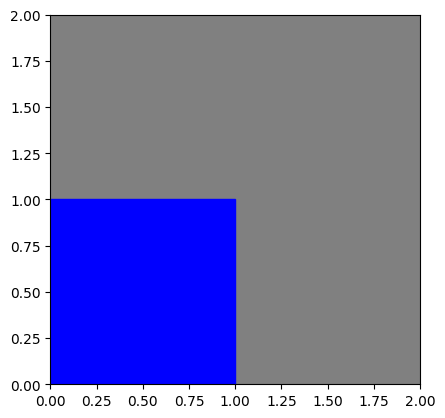

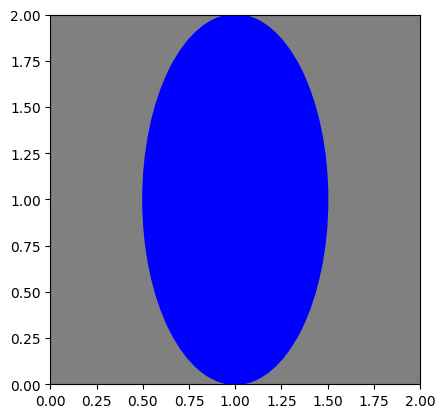

In [27]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    if a*b > m*n:
        return

    plt.xlim(0, m)
    plt.ylim(0, n)

    axes = plt.gca()
    axes.set_aspect("equal")
    axes.set_facecolor(background_color)

    rect = matplotlib.patches.Rectangle((0, 0), a, b, color=rectangle_color)
    axes.add_patch(rect)

    plt.show()

draw_rectangle(1, 1, 2, 2, '#0000FF', '#808080')


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    if a*b > m*n:
        return

    plt.xlim(0, m)
    plt.ylim(0, n)

    axes = plt.gca()
    axes.set_aspect("equal")
    axes.set_facecolor(background_color)

    rect = matplotlib.patches.Ellipse((m/2, n/2), a, b, color=ellipse_color)
    axes.add_patch(rect)

    plt.show()

draw_ellipse(1, 2, 2, 2, '#0000FF', '#808080')


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [38]:
def time_series_analysis(ts, p):
    payoff = np.mean(ts)
    variance = np.var(ts)
    deviation = np.std(ts)
    
    local_min = []
    local_max = []
    for i in range(1, len(ts) - 1):
        if ts[i] < ts[i - 1] and ts[i] < ts[i + 1]:
            local_min.append(ts[i])
        if ts[i] > ts[i - 1] and ts[i] > ts[i + 1]:
            local_max.append(ts[i])

    smooth_avr_s = np.convolve(ts, np.ones(p), mode='valid') / p

    return payoff, variance, deviation, local_min, local_max, smooth_avr_s

mean, variance, deviation, local_max, local_min, smooth_avr_s = time_series_analysis(np.array([2, 3, 4, 5]), 3)

print("Математичское ожидание:", mean)
print("Дисперсия:", variance)
print("Среднеквадратичное отклонение:", deviation)
print("Локальные максимумы:", local_max)
print("Локальные минимумы:", local_min)
print("Ряд скользящего среднего:", smooth_avr_s)

Mean: 3.5
Variance: 1.25
Standard deviation: 1.118033988749895
Local maximums: []
Local minimums: []
Smoothed series: [3. 4.]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [29]:
# Your code goes here
def OneHotEncoding(vector):
    res = np.zeros((vector.size, vector.max() + 1))
    res[np.arange(vector.size), vector] = 1
    return res

vector = np.array([0, 2, 3, 0])
print(OneHotEncoding(vector))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
